## 1. Using the attached dataset (train.csv) analyse the data and visualize the most important aspects using your preferred method. Furthermore, share three ideas on how to increase the % of Partners that accept. Document your steps where needed. 

### a. Data Analysis

#### - Data Exploration

In [1124]:
### import libraries will use for our analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [1125]:
### read my dataset(train.csv)
df = pd.read_csv('Train.csv')

In [1126]:
### Looking at our train dataset top row
df.head(10)

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
0,ID_SCUW21PVAU,4435,27,6,9:02:54,593630,Business,0,2,Bike,...,0,1,1080,-42.698343,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,0,1,730,-42.787317,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,1,1,490,-42.749180,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,1,1,510,-42.836266,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,0,0,400,-42.828195,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0
5,ID_QG327RXJZ7,2374,22,5,8:12:54,75647,Business,0,1,Bike,...,1,1,400,-42.841559,-17.242244,-42.813452,-17.233333,-42.794423,-17.244687,0
6,ID_MRC2RIJGUA,7071,14,4,9:11:35,85261,Business,0,1,Bike,...,1,1,400,-42.816480,-17.277562,-42.805966,-17.287565,-42.802569,-17.252329,0
7,ID_HDUCBCXLC1,50041,3,3,15:09:26,151271,Business,0,1,Bike,...,0,1,420,-42.842417,-17.312222,-42.843415,-17.318960,-42.855423,-17.292512,0
8,ID_XZC11Y3PJL,46731,18,5,15:01:55,593630,Business,0,2,Bike,...,0,1,420,-42.776085,-17.289053,-42.781209,-17.297432,-42.737458,-17.278413,0
9,ID_T0VWF98B3X,2413,28,6,8:12:49,59363,Business,0,2,Bike,...,0,0,800,-42.825127,-17.279260,-42.831152,-17.276845,-42.968853,-17.283623,0


In [1127]:
### getting to understand the type of data our train dataset is
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179867 entries, 0 to 179866
Data columns (total 21 columns):
ID                      179867 non-null object
order_id                179867 non-null int64
dispatch_day            179867 non-null int64
dispatch_day_of_week    179867 non-null int64
dispatch_time           179867 non-null object
client_id               179867 non-null int64
client_type             179867 non-null object
order_license_status    179867 non-null int64
order_carrier_type      179867 non-null int64
vendor_type             179867 non-null object
rider_id                179867 non-null int64
rider_license_status    179867 non-null int64
rider_carrier_type      179867 non-null int64
rider_amount            179867 non-null int64
rider_lat               179867 non-null float64
rider_long              179867 non-null float64
pickup_lat              179867 non-null float64
pickup_long             179867 non-null float64
drop_off_lat            179867 non-null float64
d

In [1128]:
### Since our dipatch_time column is an object yet its supposed to be a timestamp, we have have to convert the column then
df.dispatch_time= pd.to_datetime(df.dispatch_time)
df.dispatch_time.head(3)

0   2021-12-13 09:02:54
1   2021-12-13 13:01:37
2   2021-12-13 10:01:00
Name: dispatch_time, dtype: datetime64[ns]

In [1129]:
### getting descriptive statistics summary about the numerical datasets
df.describe()

,order_id,dispatch_day,dispatch_day_of_week,client_id,order_license_status,order_carrier_type,rider_id,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
count,179867.000000,179867.000000,179867.000000,1.798670e+05,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000,179867.000000
mean,32639.833149,16.604903,4.185198,4.654108e+05,0.239555,1.619007,70389.969944,0.589936,0.868731,517.544185,-42.817124,-17.286813,-42.817156,-17.286229,-42.814879,-17.282547,0.652843
std,18227.428596,8.528368,1.683574,6.634234e+05,0.426813,0.536552,33981.806096,0.491846,0.337695,157.385430,0.106837,0.100707,0.106425,0.100101,0.114158,0.103640,0.791099
min,100.000000,1.000000,1.000000,2.610000e+02,0.000000,0.000000,1817.000000,0.000000,0.000000,200.000000,-45.736540,-20.079067,-45.725110,-20.070241,-45.793523,-20.352897,0.000000
25%,16875.000000,9.000000,3.000000,7.564700e+04,0.000000,1.000000,40756.000000,0.000000,1.000000,410.000000,-42.832252,-17.301329,-42.829119,-17.299970,-42.830628,-17.301066,0.000000
50%,32964.000000,17.000000,4.000000,1.434280e+05,0.000000,2.000000,73485.000000,1.000000,1.000000,460.000000,-42.813961,-17.286776,-42.820037,-17.283554,-42.806976,-17.282880,0.000000
75%,48117.000000,24.000000,6.000000,5.936300e+05,0.000000,2.000000,100441.000000,1.000000,1.000000,570.000000,-42.791405,-17.264774,-42.789742,-17.263246,-42.783811,-17.259310,1.000000
max,64427.000000,31.000000,7.000000,2.568456e+06,1.000000,2.000000,123694.000000,1.000000,1.000000,2190.000000,-40.676917,-15.480446,-40.699055,-15.482671,-40.683763,-15.324765,2.000000


#### from the data we see most of dispatches happen around date 16 of the month which occurs mostly around Thursdays (4th day of the week)
#### We also notice that the Rider_amount (amount partner rider earn on delivery) column indicates a positive skewed data since the mean of rider_amount (517) is larger than its median(460)

#### Distribution Analysis - numerical data

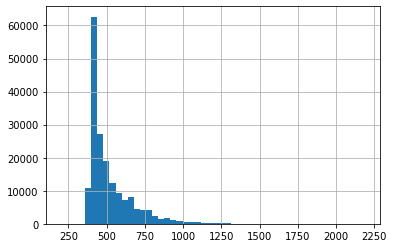

In [1130]:
### getting to understand the distribution by starting with rider_amount
df['rider_amount'].hist(bins=50)

##### this clearly shows positive skewness in data which can be backed up with the descriptive statistics before, where the rider_amount mean being greater than its median
##### From the data, that most partners earn less than 750 as compared to those earning above 750 when the complete successful delivery

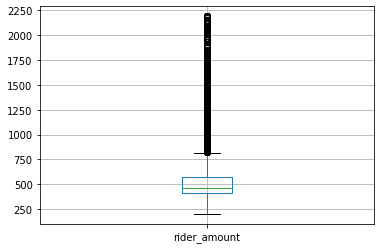

In [1131]:
### To understand clearly the rider_amount data we introduce boxplot
df.boxplot(column='rider_amount')

#### - this confirms presence of alot of outliers, this maybe attributed to different client_type(business or person)
### To asssist to better understand this we can segragate this boxplot for rider_amount by client_type 

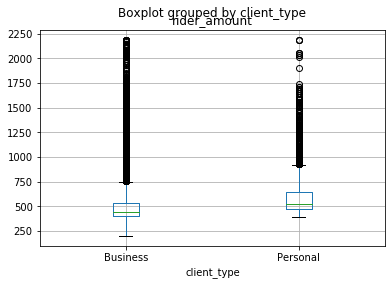

In [1132]:
df.boxplot(column='rider_amount', by='client_type')

##### - from this we can see that the customers -personal have slightly higher mean earnings as compared to the business related customers.
##### - However our in both client_type category have very higher earnings,which are appearing to be outliers

#### Categorical Data Analysis

##### - Finding the frequency of client_type, order_carrier_type, order_license_status, rider_license_status,rider_carrier_type

AxesSubplot(0.547727,0.125;0.352273x0.755) 

AxesSubplot(0.547727,0.125;0.352273x0.755) 

AxesSubplot(0.547727,0.125;0.352273x0.755) 

AxesSubplot(0.547727,0.125;0.352273x0.755) 

AxesSubplot(0.547727,0.125;0.352273x0.755) 



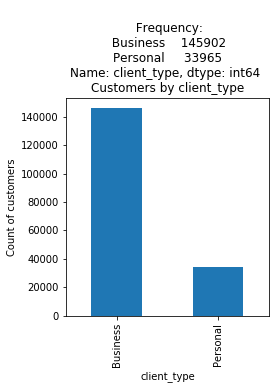

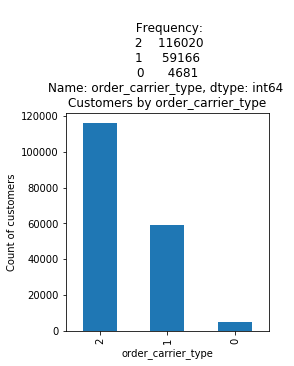

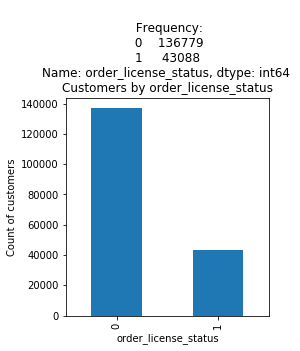

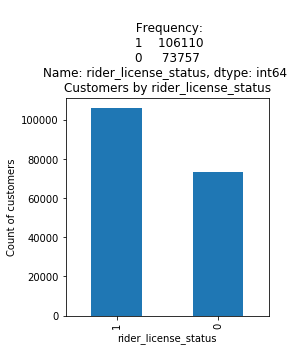

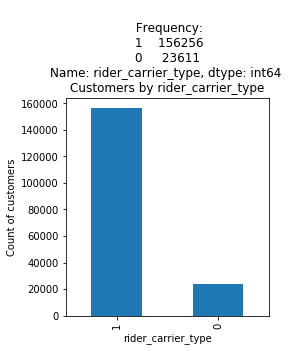

In [1133]:
columns = ['client_type', 'order_carrier_type', 'order_license_status', 'rider_license_status', 'rider_carrier_type']
x = 121
x+=1    
for i in columns:
    col=df[i].value_counts()
    #### visualizing this in barplots
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(x)
    ax.set_xlabel(f'{i}')
    ax.set_ylabel('Count of customers')
    ax.set_title(f'\n Frequency:\n {col} \nCustomers by {i}')
    ## display the freuency and bar chart
    print(f'{col.plot(kind="bar")} \n')

##### Crosstab the categorical data with the target, this will assist in understanding how various feture related to the reaction of the rider in regards to a particular dispatch

AxesSubplot(0.125,0.125;0.775x0.755) 

AxesSubplot(0.125,0.125;0.775x0.755) 

AxesSubplot(0.125,0.125;0.775x0.755) 

AxesSubplot(0.125,0.125;0.775x0.755) 

AxesSubplot(0.125,0.125;0.775x0.755) 



<Figure size 1080x576 with 0 Axes>

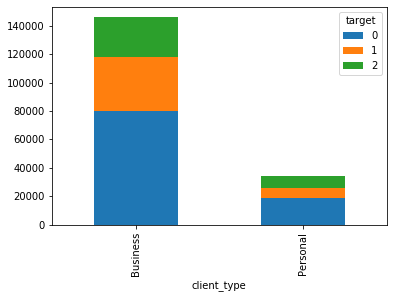

<Figure size 1080x576 with 0 Axes>

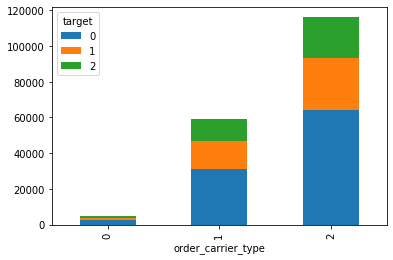

<Figure size 1080x576 with 0 Axes>

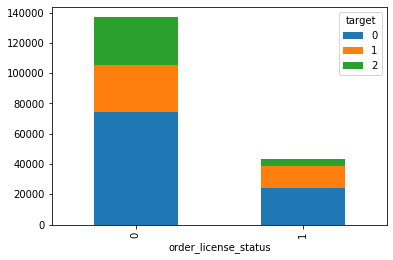

<Figure size 1080x576 with 0 Axes>

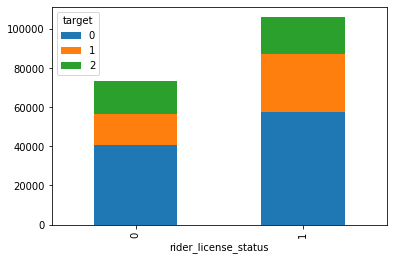

<Figure size 1080x576 with 0 Axes>

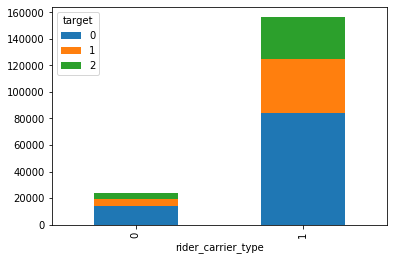

In [1134]:
columns = ['client_type', 'order_carrier_type', 'order_license_status', 'rider_license_status', 'rider_carrier_type']
y = 121
y+=1
f=df['target']
        
for j in columns:
    colm=pd.crosstab(df[j],f)
    #### visualizing this in barplots
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(15,8))
    ## display the freuency and bar chart
    print(f'{colm.plot(kind="bar",stacked=True,grid=False)} \n')

#### - from the above cross analysis you find that the rate of riders ignoring particular dispatch in a feature was high accounting for almost 50% of bar of subcategory 

### To check for any relationship between the datasets we will use pairplot to find any correlation between the columns

##### - calculate the correlation matrix of the features of data and how they correlate to one another, this also assist in machine learning feature engineering

In [1135]:
### remove columns not needed i.e. order_id,client_id, rider_id
data = df.drop(labels = ['order_id',"client_id","rider_id"],axis='columns')

In [1136]:
correlation_matrix = data.corr()

In [1137]:
correlation_matrix #the matrix

,dispatch_day,dispatch_day_of_week,order_license_status,order_carrier_type,rider_license_status,rider_carrier_type,rider_amount,rider_lat,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target
dispatch_day,1.000000,-0.042488,0.012625,0.014123,0.009466,-0.004434,0.010065,-0.005688,-0.003430,-0.006340,-0.003201,-0.003291,-0.003128,-0.001308
dispatch_day_of_week,-0.042488,1.000000,-0.013864,-0.019226,-0.004414,0.001053,0.004447,-0.010683,-0.006819,-0.009943,-0.006364,-0.008065,-0.000028,0.001395
order_license_status,0.012625,-0.013864,1.000000,0.195899,0.467704,0.113604,-0.058041,-0.022029,0.017722,-0.021121,0.025555,-0.017327,0.013253,-0.076726
order_carrier_type,0.014123,-0.019226,0.195899,1.000000,0.106393,0.011211,0.018328,-0.008363,0.040508,-0.000765,0.041450,-0.023534,-0.004211,-0.011106
rider_license_status,0.009466,-0.004414,0.467704,0.106393,1.000000,0.286964,-0.027711,-0.018145,0.024066,-0.017882,0.027880,-0.006143,0.015262,-0.025937
rider_carrier_type,-0.004434,0.001053,0.113604,0.011211,0.286964,1.000000,-0.067175,0.068990,0.049431,0.069593,0.053466,0.049258,0.046095,0.024563
rider_amount,0.010065,0.004447,-0.058041,0.018328,-0.027711,-0.067175,1.000000,-0.033229,-0.007061,-0.033394,-0.007145,-0.075227,0.012466,0.123772
rider_lat,-0.005688,-0.010683,-0.022029,-0.008363,-0.018145,0.068990,-0.033229,1.000000,0.914423,0.994349,0.915676,0.870438,0.874255,-0.019695
rider_long,-0.003430,-0.006819,0.017722,0.040508,0.024066,0.049431,-0.007061,0.914423,1.000000,0.928259,0.993747,0.852945,0.909791,-0.023646
pickup_lat,-0.006340,-0.009943,-0.021121,-0.000765,-0.017882,0.069593,-0.033394,0.994349,0.928259,1.000000,0.928272,0.874896,0.881132,-0.019450


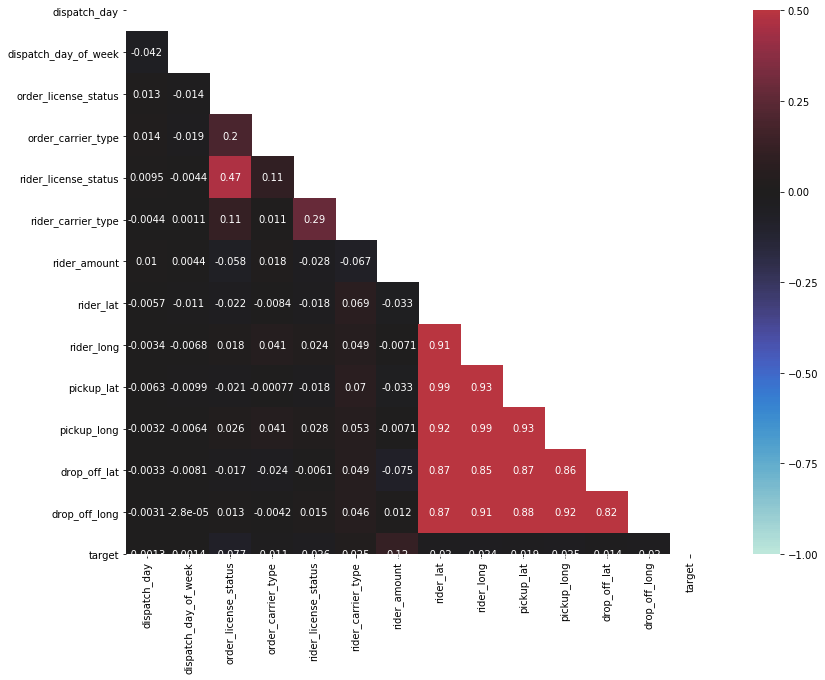

In [1138]:
### creating a heat map to visualie the correlation between variables
plt.figure(figsize=(15,10),)
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data.corr(),annot =True,mask = mask,vmax=.5,vmin=-1,center=0,square=True)

##### - for both the heat map and correlation_matrix it clearly shows very low correlation between variables and the target variable, where the rider_amount variable is the closest such that, the closeness to rider acceptance to dispatch the higher the amount the partner rider is going to earn (positive correlation - 0.12)

### Data Munging- this where based on the data noisiness we will have to clean for better analysis

In [1139]:
#### Check if their missing values in our data
df.isnull().sum()

ID                      0
order_id                0
dispatch_day            0
dispatch_day_of_week    0
dispatch_time           0
client_id               0
client_type             0
order_license_status    0
order_carrier_type      0
vendor_type             0
rider_id                0
rider_license_status    0
rider_carrier_type      0
rider_amount            0
rider_lat               0
rider_long              0
pickup_lat              0
pickup_long             0
drop_off_lat            0
drop_off_long           0
target                  0
dtype: int64

##### our data has no missing values

#### tackling the outliers in the rider_amount column, we will apply log transformation to nullify  their effective

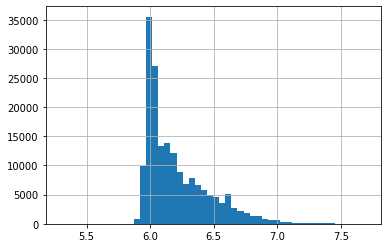

In [1140]:
df['rider_amount_log']=np.log(df['rider_amount'])
df['rider_amount_log'].hist(bins=50)

#### Still the outliers are there (skew), we will have to identify the outliers and remove them from our data

In [1141]:
### identifying and removing the outliers
### Detection
Q1 = np.percentile(df['rider_amount'],25,interpolation='midpoint')
Q3 = np.percentile(df['rider_amount'],75,interpolation='midpoint')
### solve for IQR
IQR = Q3 - Q1
print('Old shape:',df.shape)
###Upper bound
upper = np.where(df['rider_amount']>= Q3+1.5*IQR)

### lower bound
lower = np.where(df['rider_amount']<= Q1-1.5*IQR)

### removing the outliers
df.drop(upper[0],inplace =True)
df.drop(lower[0],inplace=True)
print('New shape:',df.shape)

Old shape: (179867, 22)
New shape: (169678, 22)


### Building a predictive model

#### feature extraction part, where we drop some columns that really do not have effect on the predictions of the target

In [1142]:
df.columns

Index(['ID', 'order_id', 'dispatch_day', 'dispatch_day_of_week',
       'dispatch_time', 'client_id', 'client_type', 'order_license_status',
       'order_carrier_type', 'vendor_type', 'rider_id', 'rider_license_status',
       'rider_carrier_type', 'rider_amount', 'rider_lat', 'rider_long',
       'pickup_lat', 'pickup_long', 'drop_off_lat', 'drop_off_long', 'target',
       'rider_amount_log'],
      dtype='object')

In [1143]:
feature = df.loc[:,['dispatch_day', 'dispatch_day_of_week', 'client_type', 'order_license_status',
       'order_carrier_type','rider_license_status','rider_carrier_type', 'rider_amount']]

In [1144]:
### X variables will be the feature and target will be target
feature = pd.get_dummies(feature)

### Since target is mulitple variable target, we can unify,
y = pd.get_dummies(df.target)
ignore=y.loc[:,0]
decline=y.loc[:,1]
accept = y.loc[:,2]

In [1145]:
# from sklearn import preprocessing
# standard = preprocessing.scale(feature)
# print(standard)

In [1146]:
### importing my metrics for machine learning purposes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [1147]:
#Come up with quick hypothesis from our data
### There is a higher chance of acceptance
### 1. When the rider_amount(earnings) are high
### besides, the other features also do have an effect in prediction which we will use later in case we dont get the best accuracy score

#### Prediction Is either the rider Ignore or (decline & accept) where 1 - ignore 0 - decline 0- accept
#### Second prediction will be where 0-ignore , 1- decline, 0 -accept
#### Third prediction will be where 0- ignore, 0-decline, 1 - accept

In [1148]:
X_train,X_test,Y_train_ign,Y_test_ign= train_test_split(feature,ignore, test_size = 0.33, random_state = 42)
X_train,X_test,Y_train_dec,Y_test_dec= train_test_split(feature,decline, test_size = 0.33, random_state = 42)
X_train,X_test,Y_train_acc,Y_test_acc= train_test_split(feature,accept, test_size = 0.33, random_state = 42)

In [1149]:
def functions(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    return metrics.accuracy_score(predictions,Y_test)

In [1150]:
model1 = LogisticRegression(solver='lbfgs')
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier(n_estimators=100)

In [1151]:
models = [model1, model2, model3]

In [1152]:
#for first prediction
for i in range(0, len(models)):
    score = functions(models[i],X_train,X_test,Y_train_ign, Y_test_ign)
    print(i+1 , 'Ignoring: Score',score)
    
#for nd prediction
for i in range(0, len(models)):
    score = functions(models[i],X_train,X_test,Y_train, Y_test)
    print(i+1 , 'Declining: Score',score)

#for 3rd prediction
for i in range(0, len(models)):
    score = functions(models[i],X_train,X_test,Y_train_acc, Y_test_acc)
    print(i+1 , 'Accepting: Score',score)

C:\Users\Castro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1 Ignoring: Score 0.5560595778119084
2 Ignoring: Score 0.5182876736793228
3 Ignoring: Score 0.5243418937743329


C:\Users\Castro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1 Declining: Score 0.5560595778119084
2 Declining: Score 0.5183233917919777
3 Declining: Score 0.5245204843376076


C:\Users\Castro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1 Accepting: Score 0.8104082580276458
2 Accepting: Score 0.7814230096081723
3 Accepting: Score 0.7788334464406901


### Since our model Accuracy is low, we have to search for the best fit features for our predictions

Feature: 0, Score: -0.00901
Feature: 1, Score: -0.04715
Feature: 2, Score: -0.89692
Feature: 3, Score: -0.15483
Feature: 4, Score: -0.13684
Feature: 5, Score: -0.10097
Feature: 6, Score: 0.00189
Feature: 7, Score: -0.73117
Feature: 8, Score: -0.11145


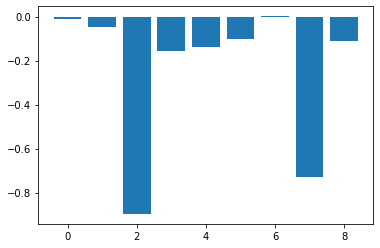

In [1153]:
# get importance Logistic Regression
importance = model1.coef_[0]
# summarize feature importance
for j,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (j,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Predicting on the test data

#### Set up the test data, for prediction

In [1154]:
test_data = pd.read_csv('Test.csv')
test_data.shape

(76791, 20)

In [1155]:
#### features for prediction
test_feature = test_data.loc[:,['dispatch_day', 'dispatch_day_of_week', 'client_type', 'order_license_status',
       'order_carrier_type','rider_license_status','rider_carrier_type','rider_amount']]
## encode
test_feature = pd.get_dummies(test_feature)

In [1156]:
## First Prediction will be either Accepting-1 or (0- decline and 0 - ignore)
### We will replace back the initial code of accept  from 1 to 2
### we use model1 which is Logistic regression
model.fit(X_train, Y_train_acc)
predicts = model1.predict(test_feature)

predict_acc = {'target': predicts}
predict = pd.DataFrame(predict_acc)
test_ID = test_data['ID']

### joining the two series of data into a table
PredictionFile_acc = test_feature.join(predict)
PredictionFile_acc = PredictionFile_acc.join(test_ID)
AcceptanceFile = PredictionFile_acc.loc[PredictionFile_acc['target']==1]
AcceptanceFile['target']=2

### Create A dataframe of test_ID and prediction table
AcceptanceFile=AcceptanceFile.loc[:,['ID','target']]
AcceptanceFile

C:\Users\Castro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Castro\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,ID,target
120,ID_U0L43Q4B2X,2
188,ID_S1CNKN1M32,2
191,ID_FK2ZR0813O,2
261,ID_D0978SNFS8,2
378,ID_6QZ6SQ3HR0,2
...,...,...
76391,ID_WK2IM15TF9,2
76396,ID_LLKSXY1484,2
76441,ID_JCI39FDOEP,2
76631,ID_EJ8LPGCCEO,2


In [1176]:
## Second Prediction, will filter out accepted predictions and remain with th zeros (decline/ignore)
DeclineFile = PredictionFile_acc.loc[PredictionFile_acc['target']==0]

Decline= DeclineFile.iloc[:,:9]

In [1177]:
## Where now we will predict either decline-1 or ignore - 0
model.fit(X_train, Y_train_dec)
predictss = model1.predict(Decline)

predic_dec = {'target2':predictss}
predict_dec = pd.DataFrame(predic_dec)

Decline = predict_dec.join(DeclineFile)
Decline_dat=Decline.loc[:,['ID','target2']]
Decline_dat

C:\Users\Castro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,ID,target2
0,ID_3B4D2Q2DSI,0
1,ID_7MPWFJ9XFI,0
2,ID_5VVT3Q3M5B,0
3,ID_C2GTVS1H7K,0
4,ID_0YGC8V3PFT,0
...,...,...
75899,ID_49OG8FQG5H,0
75900,ID_F27GVXQ5DU,0
75901,ID_YULV7FOUQE,0
75902,ID_3L9WF3KGSJ,0


In [1178]:
columns = ['ID','target']
Decline_dat.columns = columns

In [1179]:
Final_data = Decline_dat.append(AcceptanceFile)
Final_data['target'].value_counts()

0    75904
2      887
Name: target, dtype: int64

In [ ]:
### Save as a csv file
SubmissionFile = Final_data.to_csv('Submission.csv',index=False)